# Beispiel: Neuronale Netze mit Python keras

Benötigt python 3.8, keras, tensorflow

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

Mnist als fertigen Datensatz laden

In [14]:
# MNIST-Daten laden
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Daten vorverarbeiten
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

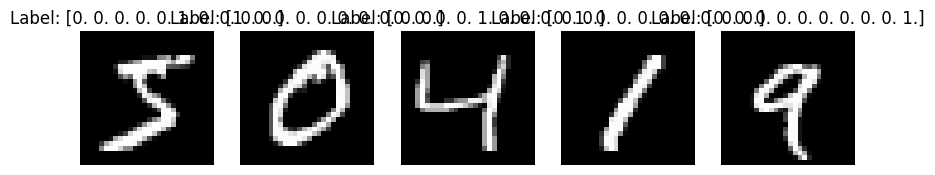

In [15]:
# Funktion zur Anzeige von Beispielbildern
def plot_sample_images(images, labels, sample_size=5):
    plt.figure(figsize=(10, 2))
    for i in range(sample_size):
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

# Beispielbilder anzeigen
plot_sample_images(train_images, train_labels)

Modell bauen

In [23]:
# Modell erstellen
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
# Modell kompilieren
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Modell trainieren
Tipp: Wiederholen Sie die Ausführung der Zelle und beobachten Sie die Accuracy!

In [27]:
# 2 Epochen ist eher wenig. In der Praxis werden oft 10-100 Epochen verwendet. Wir wählen hier bewusst eine niedrige Zahl, um den Fortschritt beobachten zu können.
# Eine batch size von 512 ist eine ausgesprochen grobe Auflösung. Empfohlen wird hier eher 32-128. Wir wählen hier bewusst eine niedrige Zahl, um den Fortschritt beobachten zu können.

# Modell trainieren
model.fit(train_images, train_labels, epochs=2, batch_size=512, validation_data=(test_images, test_labels))


Epoch 1/2
118/118 [==============================] - 1s 6ms/step - loss: 0.1023 - accuracy: 0.9715 - val_loss: 0.1113 - val_accuracy: 0.9669
Epoch 2/2
118/118 [==============================] - 1s 8ms/step - loss: 0.0908 - accuracy: 0.9741 - val_loss: 0.1024 - val_accuracy: 0.9698


Modell testen

In [28]:

# Modell bewerten
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.1024 - accuracy: 0.9698
Test accuracy: 0.9697999954223633


Modell auf zufälligen Bildern ausprobieren:

1/1 [==============================] - 0s 105ms/step


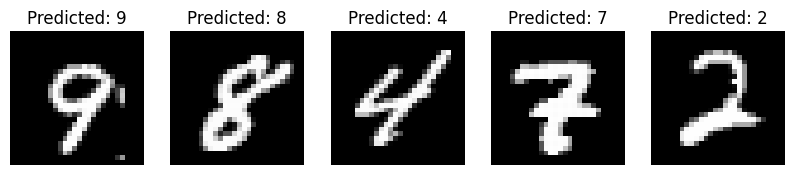

In [29]:
# Zufällige Bilder auswählen
random_indices = np.random.choice(test_images.shape[0], 5, replace=False)
random_images = test_images[random_indices]
test_images = test_images[random_indices]

# Klassifikationen vornehmen
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Ergebnisse anzeigen
plt.figure(figsize=(10, 2))
for i, (image, prediction) in enumerate(zip(random_images, predicted_labels)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {prediction}')
    plt.axis('off')
plt.show()
